In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


In [5]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [8]:
df['zip'].value_counts().head(5)

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

In [12]:
df['title'].nunique()

133

In [13]:
df['Reason'] = df['title'].apply(lambda x : x[:x.index(':')])

In [14]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
326395       Fire
326396        EMS
326397        EMS
326398    Traffic
326399    Traffic
326400    Traffic
326401    Traffic
326402        EMS
326403       Fire
326404    Traffic
326405       Fire
326406       Fire
326407    Traffic
326408    Traffic
326409    Traffic
326410    Traffic
326411    Traffic
326412        EMS
326413       Fire
326414    Traffic
326415    Traffic
326416    Traffic
326417        EMS
326418       Fire
326419    

In [15]:
df['Reason'].value_counts().head(1)

EMS    161441
Name: Reason, dtype: int64

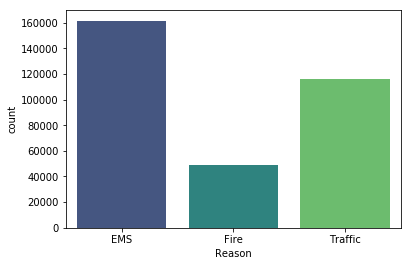

In [18]:
sns.countplot(x='Reason', data=df, palette='viridis')

In [20]:
type(df['timeStamp'].iloc[0])

str

In [21]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [22]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [23]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
5        2015-12-10 15:39:04
6        2015-12-10 16:46:48
7        2015-12-10 16:17:05
8        2015-12-10 16:51:42
9        2015-12-10 17:35:41
10       2015-12-10 17:33:50
11       2015-12-10 16:32:10
12       2015-12-10 17:15:49
13       2015-12-10 17:12:47
14       2015-12-10 17:09:49
15       2015-12-10 17:31:00
16       2015-12-10 17:42:44
17       2015-12-10 17:41:54
18       2015-12-10 17:43:29
19       2015-12-10 17:45:23
20       2015-12-10 17:43:45
21       2015-12-10 17:53:22
22       2015-12-10 17:59:24
23       2015-12-10 18:00:38
24       2015-12-10 17:58:22
25       2015-12-10 18:02:02
26       2015-12-10 18:02:38
27       2015-12-10 18:05:19
28       2015-12-10 18:05:39
29       2015-12-10 18:10:40
                 ...        
326395   2018-03-24 12:25:39
326396   2018-03-24 12:24:22
326397   2018-03-24 12:25:45
326398   2018-

In [24]:
time = df['timeStamp'].iloc[0]

In [27]:
time.dayofweek

3

In [28]:
df['Hour'] = df['timeStamp'].apply(lambda time : time.hour)

In [29]:
df['Month'] = df['timeStamp'].apply(lambda time : time.month)

In [30]:
df['Day of Week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [31]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3:'Thu', 4:'Fri',5:'Sat',6:'Sun'}

In [33]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [34]:
df['Day of Week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
5         Thu
6         Thu
7         Thu
8         Thu
9         Thu
10        Thu
11        Thu
12        Thu
13        Thu
14        Thu
15        Thu
16        Thu
17        Thu
18        Thu
19        Thu
20        Thu
21        Thu
22        Thu
23        Thu
24        Thu
25        Thu
26        Thu
27        Thu
28        Thu
29        Thu
         ... 
326395    Sat
326396    Sat
326397    Sat
326398    Sat
326399    Sat
326400    Sat
326401    Sat
326402    Sat
326403    Sat
326404    Sat
326405    Sat
326406    Sat
326407    Sat
326408    Sat
326409    Sat
326410    Sat
326411    Sat
326412    Sat
326413    Sat
326414    Sat
326415    Sat
326416    Sat
326417    Sat
326418    Sat
326419    Sat
326420    Sat
326421    Sat
326422    Sat
326423    Sat
326424    Sat
Name: Day of Week, Length: 326425, dtype: object

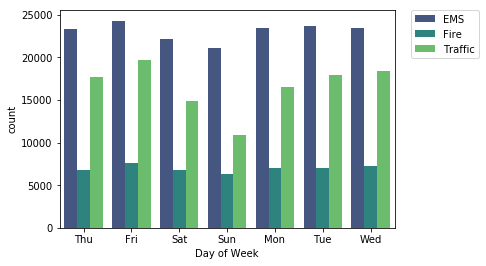

In [38]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad =0.)

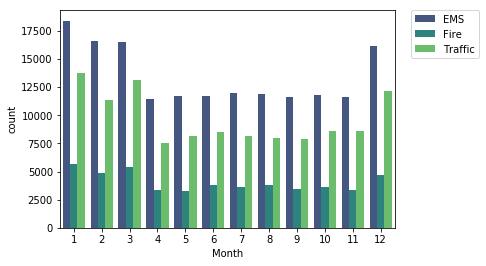

In [39]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad =0.)

In [40]:
byMonth = df.groupby('Month').count()

In [41]:
byMonth.head()

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      37824  37824  37824  33480  37824      37824  37812  37824  37824   
2      32828  32828  32828  28963  32828      32828  32817  32828  32828   
3      34987  34987  34987  31070  34987      34987  34973  34987  34987   
4      22343  22343  22343  19671  22343      22343  22336  22343  22343   
5      23093  23093  23093  20254  23093      23093  23082  23093  23093   

       Reason   Hour  Day of Week  
Month                              
1       37824  37824        37824  
2       32828  32828        32828  
3       34987  34987        34987  
4       22343  22343        22343  
5       23093  23093        23093

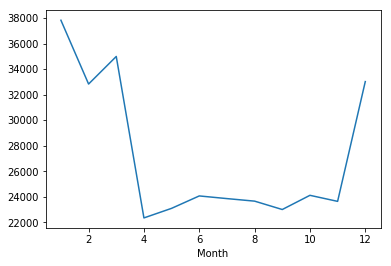

In [42]:
byMonth['lat'].plot()

C:\Users\nilto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


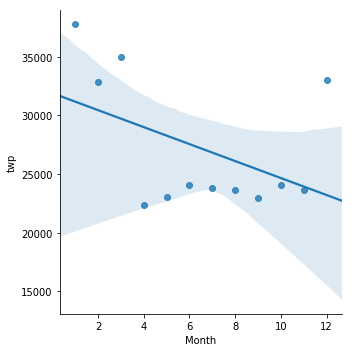

In [45]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [46]:
t = df['timeStamp'].iloc[0]

In [47]:
df['Date'] = df['timeStamp'].apply(lambda t : t.date())

In [48]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day of Week        Date  
0      REINDEER CT & DEAD END  1    EMS    17     12         Thu  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12         Thu  2015-12-10  
2                    HAWS AVE  1   Fire    14     12         Thu  2015-12-10  
3          AIRY ST & SWEDE ST  1    EMS    16     12         Thu  2015-12-10  
4    CHERRYWOOD CT & DEAD END  1    EMS    16     12         Thu  2015-12-10

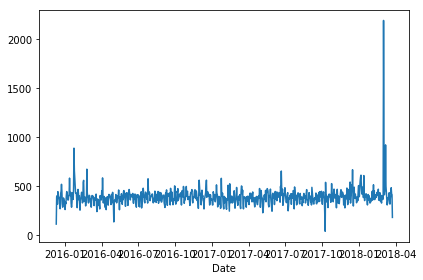

In [53]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

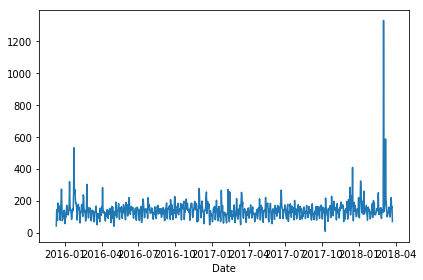

In [54]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

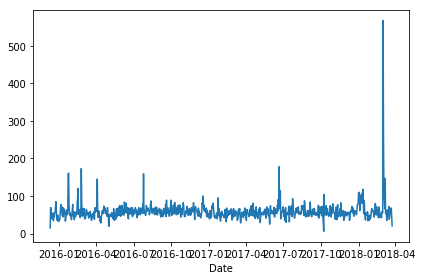

In [56]:
df.loc[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

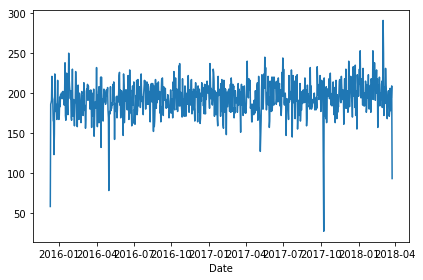

In [57]:
df.loc[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [63]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

Hour           0     1    2    3    4    5     6     7     8     9   ...   \
Day of Week                                                          ...    
Fri           896   789  701  644  633  786  1286  2087  2487  2570  ...    
Mon           931   732  663  585  683  862  1291  2175  2714  2766  ...    
Sat          1130   999  908  767  742  788   957  1295  1674  2132  ...    
Sun          1159  1026  955  800  717  736   880  1196  1492  1849  ...    
Thu           871   690  727  603  573  833  1386  2254  2613  2719  ...    
Tue           842   698  625  598  634  858  1386  2269  2853  2764  ...    
Wed           805   738  620  626  560  798  1382  2319  2751  2744  ...    

Hour           14    15    16    17    18    19    20    21    22    23  
Day of Week                                                              
Fri          3290  3562  3726  3596  2858  2562  2205  1916  1765  1396  
Mon          2729  3034  3082  3116  2729  2179  1912  1503  1303  1003  
Sat          2643  2563  2529  2525  2477  2320  2074  1839  1579  1469  
Sun          2276  2170  2200  2234  2179  2067  1753  1536  1235  1177  
Thu          2863  3044  3017  3335  2707  2226  1974  1724  1360  1120  
Tue          2937  3149  3335  3286  2918  2283  1960  1660  1329  1025  
Wed          3095  3211  3413  3435  2782  2296  2064  1682  1422  1103  

[7 rows x 24 columns]

In [64]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

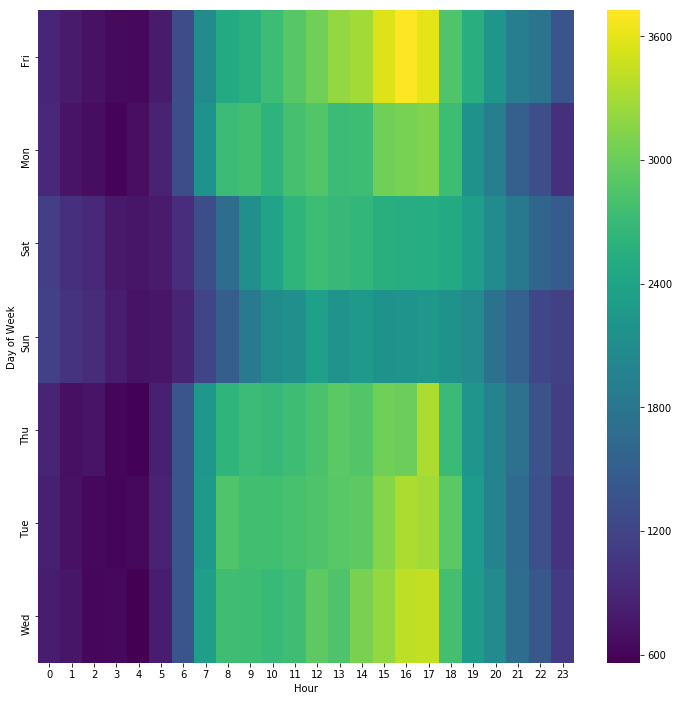

In [67]:
plt.figure(figsize=(12,12))
sns.heatmap(dayHour, cmap = 'viridis')

<Figure size 864x864 with 0 Axes>

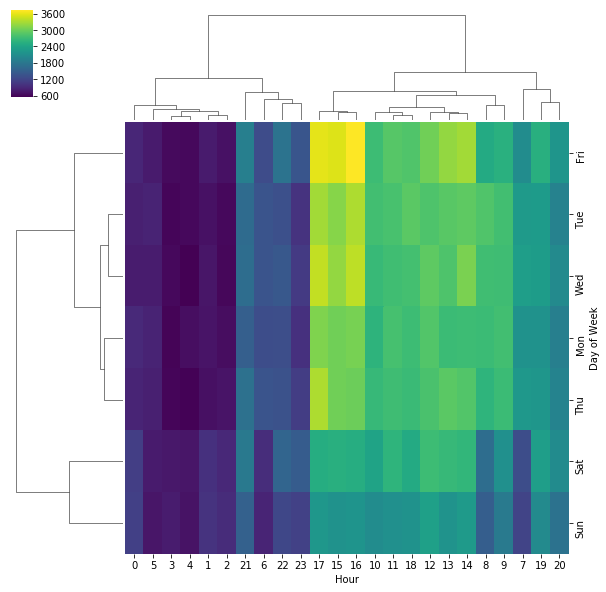

In [68]:
plt.figure(figsize=(12,12))
sns.clustermap(dayHour, cmap = 'viridis')

In [70]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

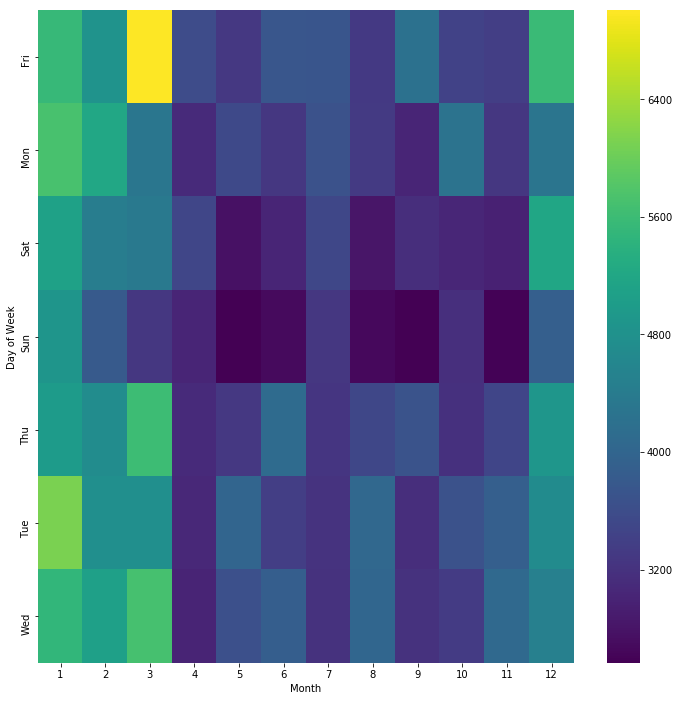

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(dayMonth, cmap = 'viridis')

<Figure size 864x864 with 0 Axes>

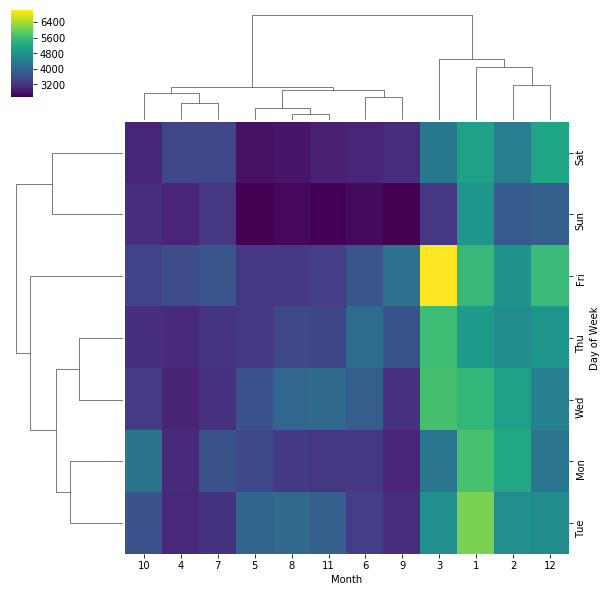

In [72]:
plt.figure(figsize=(12,12))
sns.clustermap(dayMonth, cmap = 'viridis')